# Libraries

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as proportion
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import normaltest
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import ttest_ind, ttest_rel, f_oneway, kstest, shapiro, wilcoxon
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

# Load and Group data - Class

In [3]:
class LoaderGrouper:

    def __init__(self, filename):
        self.filename = filename

    def load_rename_data (self):
        rename_list = {"Unnamed: 0_level_0Unnamed: 0_level_1":"soundID","Emotionratingmean":"emotionrating",
                    "Emotionmax":"emotion","datetimemax":"datetime","Soundgroupmax":"soundgroup"} 
        drop_list = ['heart_ratestd','skin_tempstd','est_02_variationstd','est_02_variationmean'] #dropped spo2 temp
        df = pd.read_csv(self.filename, header=[0,1])
        df.columns = [''.join(col) for col in df.columns]
        df.rename(columns = rename_list, inplace=True)
        df.drop([0], axis = 0, inplace=True) #drop first row cos its empty
        df.drop(drop_list, axis=1, inplace=True)
        # df.dropna(axis=0, inplace=True)
        print("Missing Values\n", df.isnull().sum())
        return df

    def split_data(self):
        df = self.load_rename_data()

        #divides data based on emotion experienced
        df_fear  = df[(df.emotion == "Fear")]
        df_sadness = df[(df.emotion == "Sadness")]
        df_happiness = df[(df.emotion == "Happiness")]

        df_animal = df[df.soundgroup == "Animal"]
        df_nature = df[(df.soundgroup == "Nature")]
        df_transport = df[(df.soundgroup == "Transport")]
        df_people = df[(df.soundgroup == "People")]

        return df_fear, df_sadness, df_happiness, df_animal, df_nature, df_transport, df_people

    def create_list_name(self):

            data_frames = self.split_data()
            df_list = [df for df in data_frames]
            df_namelist = []
            for df in df_list:
                if (df.emotion.values == "Fear").all(): 
                    df_namelist.append("fear")
                elif(df.emotion.values=="Sadness").all(): 
                    df_namelist.append("sadness")
                elif(df.emotion.values=="Happiness").all():
                    df_namelist.append("happiness")
                elif (df.soundgroup.values=="Animal").all(): 
                    df_namelist.append("animal")
                elif (df.soundgroup.values=="Nature").all(): 
                    df_namelist.append("nature")
                elif (df.soundgroup.values=="People").all(): 
                    df_namelist.append("people")
                else:
                    df_namelist.append('transport')
            return df_list, df_namelist

    def create_emotion_df(self):
        df = self.split_data()
        df_fear  = df[(df.emotion == "Fear")]
        df_sadness = df[(df.emotion == "Sadness")]
        df_happiness = df[(df.emotion == "Happiness")]
        return df_fear,df_sadness,df_happiness

    def create_soundgrp_df(df):
        df_animal = df[df.soundgroup == "Animal"]
        df_nature = df[(df.soundgroup == "Nature")]
        df_transport = df[(df.soundgroup == "Transport")]
        df_people = df[(df.soundgroup == "People")]
        return df_animal, df_nature,df_transport,df_people



# Visualize Descriptive Statistics - Subclass

In [13]:
class Visualizer(LoaderGrouper):

    def __init__(self, filename):
        super().__init__(filename)
    
    def visualize_boxplot(self):
        dfs = self.load_rename_data()
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,10))
        sns.boxplot(ax=axes[0], data=dfs, x='emotion', y='heart_ratemean')
        sns.boxplot(ax=axes[1], data=dfs, x='soundgroup', y='heart_ratemean')
        plt.show()
        
    def visualize_histplot(self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            #need to pull title for all plots
            sns.histplot(data=df, x="heart_ratemean", kde=True )
            plt.title(f'{name}')
            plt.show()

    def visualize_qqplot(self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            qqplot(df.heart_ratemean, line= "s")
            plt.title(f'{name}')
            plt.show()    

    

    


Instance

Missing Values
 soundID           0
datetime          0
emotionrating     0
emotion           0
heart_ratemean    0
skin_tempmean     0
soundgroup        0
dtype: int64


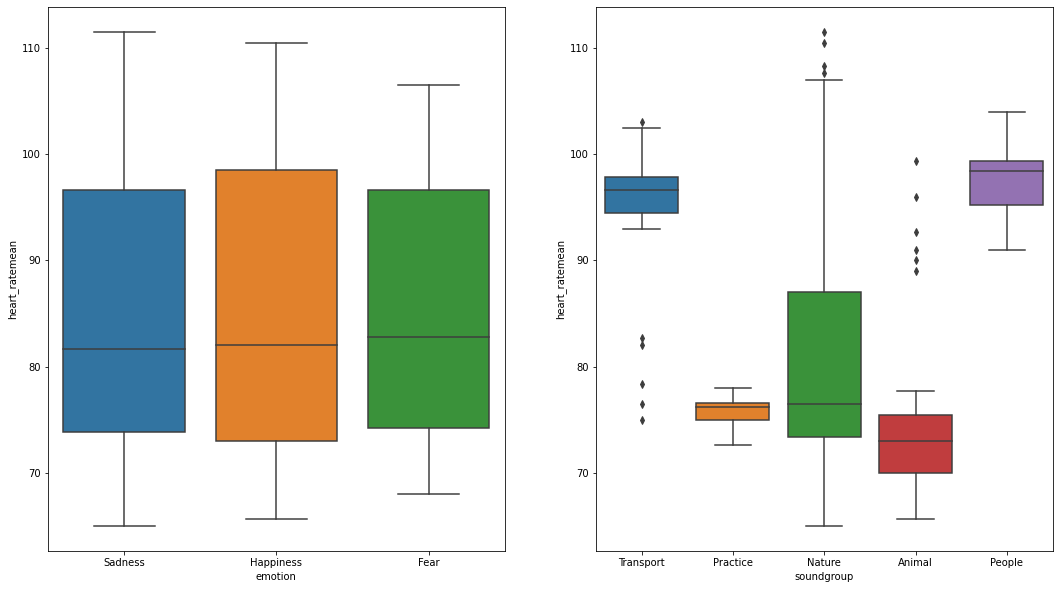

Missing Values
 soundID           0
datetime          0
emotionrating     0
emotion           0
heart_ratemean    0
skin_tempmean     0
soundgroup        0
dtype: int64


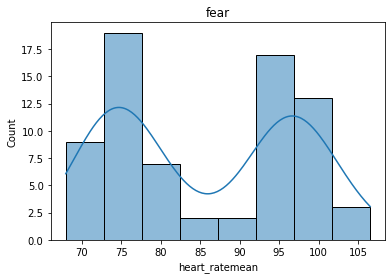

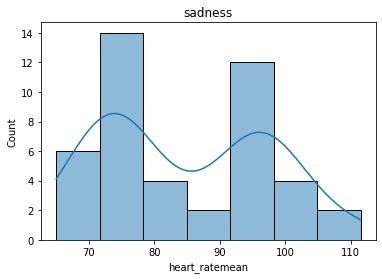

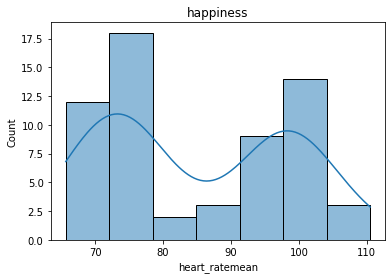

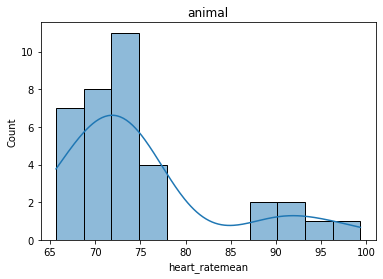

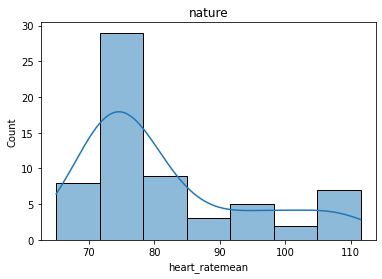

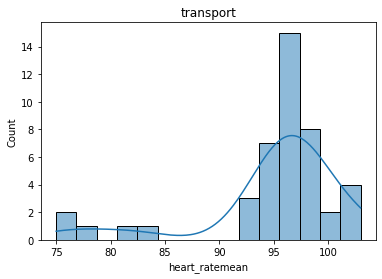

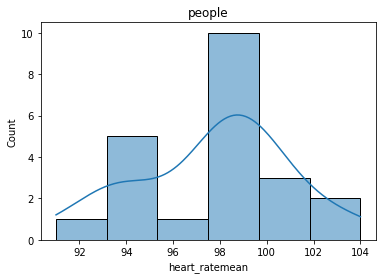

Missing Values
 soundID           0
datetime          0
emotionrating     0
emotion           0
heart_ratemean    0
skin_tempmean     0
soundgroup        0
dtype: int64


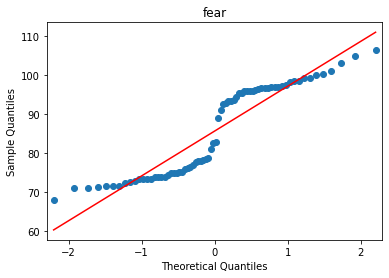

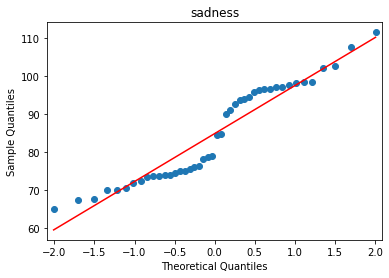

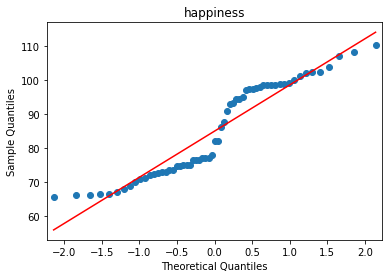

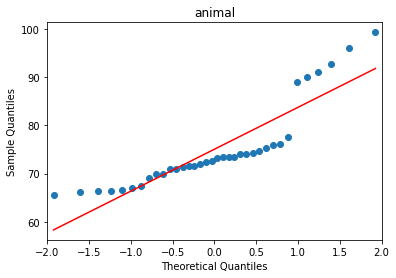

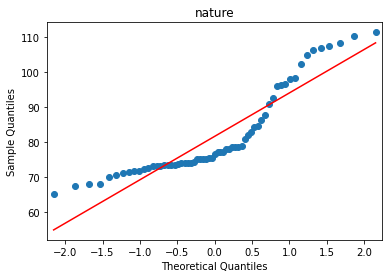

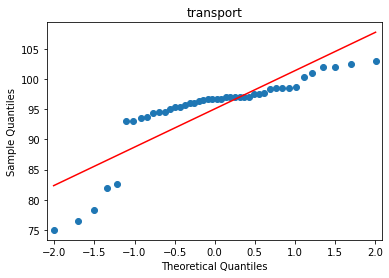

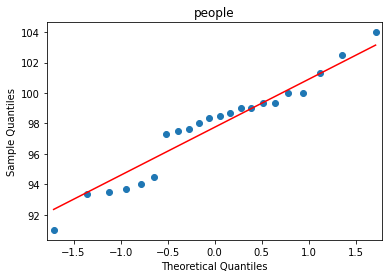

In [14]:
df = Visualizer('Extracted data 2/df_combinedined_user001_exp001-Missing values filled.csv')
df.visualize_boxplot()
df.visualize_histplot()
df.visualize_qqplot()

# Statistical Normality Test - Subclass

Hypothesis Test:

H0: The sample is gaussian (Normal distribution).
H1: The sample is not gaussian

In [23]:
class Normal(LoaderGrouper):
    
    def __init__(self, filename, col_name):
        super().__init__(filename)
        self.col_name = col_name

    def shapiro_test (self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            stat, p_val = shapiro(df[self.col_name])
            print('Statistics=%.3f, p=%.3f' % (stat, p_val))
            # interpret
            alpha = 0.05
            if p_val > alpha:
                print(f'\n{name}\n', 'Sample looks Gaussian - fail to reject H0')
            else:
                print(f'\n{name}\n', 'Sample does not look Gaussian - reject H0')

    def normal_test(self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            stat, p_val = normaltest(df[self.col_name])
            print('stat=%.3f, p=%.3f' % (stat, p_val))
            if p_val > 0.05:
                print(f'\n{name}\n','Sample looks Gaussian - fail to reject H0')
            else:
                print(f'\n{name}\n','Sample does not look Gaussian - reject H0')

    

Instance

In [24]:
df = Normal('Extracted data 2/df_combinedined_user001_exp001-Missing values filled.csv','heart_ratemean')
df.shapiro_test()


Missing Values
 soundID           0
datetime          0
emotionrating     0
emotion           0
heart_ratemean    0
skin_tempmean     0
soundgroup        0
dtype: int64
Statistics=0.863, p=0.000

fear
 Sample does not look Gaussian - reject H0
Statistics=0.912, p=0.003

sadness
 Sample does not look Gaussian - reject H0
Statistics=0.896, p=0.000

happiness
 Sample does not look Gaussian - reject H0
Statistics=0.797, p=0.000

animal
 Sample does not look Gaussian - reject H0
Statistics=0.838, p=0.000

nature
 Sample does not look Gaussian - reject H0
Statistics=0.742, p=0.000

transport
 Sample does not look Gaussian - reject H0
Statistics=0.952, p=0.353

people
 Sample looks Gaussian - fail to reject H0


In [25]:
df.normal_test()

Missing Values
 soundID           0
datetime          0
emotionrating     0
emotion           0
heart_ratemean    0
skin_tempmean     0
soundgroup        0
dtype: int64
stat=444.860, p=0.000

fear
 Sample does not look Gaussian - reject H0
stat=14.930, p=0.001

sadness
 Sample does not look Gaussian - reject H0
stat=64.133, p=0.000

happiness
 Sample does not look Gaussian - reject H0
stat=13.498, p=0.001

animal
 Sample does not look Gaussian - reject H0
stat=10.911, p=0.004

nature
 Sample does not look Gaussian - reject H0
stat=26.541, p=0.000

transport
 Sample does not look Gaussian - reject H0
stat=0.412, p=0.814

people
 Sample looks Gaussian - fail to reject H0


# Non-Parametric Test

In [ ]:
class NonParametricTests(LoaderGrouper):
    
    def __init__(self, filename,data1,data2):
        super().__init__(filename)
        self.data1 = data1
        self.data2 = data2


    def mann_whiteneyu(self):
        df_fear,df_sadness,df_happiness = self.create_emotion_df #think of how to implement this
        stat, p = mannwhitneyu(self.data1, self.data2)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')   